# CUT MATERIAL

### Notebook setup

In [1]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (6.25, 2.0)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

def savefig(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

<Figure size 640x480 with 0 Axes>

#### Pandas equivalent

In [2]:
import pandas as pd

grades = [80, 90, 70, 60]
gseries = pd.Series(grades)
gseries.mean()

75.0

$N \sim \mathcal{N}(\mu,\sigma)$ has the probability density function:

$$
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 },
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.
We use the notation $\mathcal{N}(\mu, \sigma)$ to describe the distribution as math,
and `norm(mu,sigma)` to describe as computer model.

In [3]:
import numpy as np

def fN(x, mu=0, sigma=1):
    const = 1 / (sigma*np.sqrt(2*np.pi))
    exp = np.exp( -1/2 * ( (x-mu)/sigma )**2 )
    return const * exp

In [4]:
fN(3, 2, 3)

0.12579440923099774

In [5]:
def mean(sample):
    total = 0
    for xi in sample:
        total = total + xi
    avg = total / len(sample)
    return avg

### Problem NN (numerical math considerations)

We'll use the Python library NumPy (module `numpy` imported as `np`) 
to help us with the fancy math operations.
To compute $e^x$ we can call `np.exp(x)`,
and to compute the factorial of `n` we can call `np.math.factorial(n)`.

<StemContainer object of 3 artists>

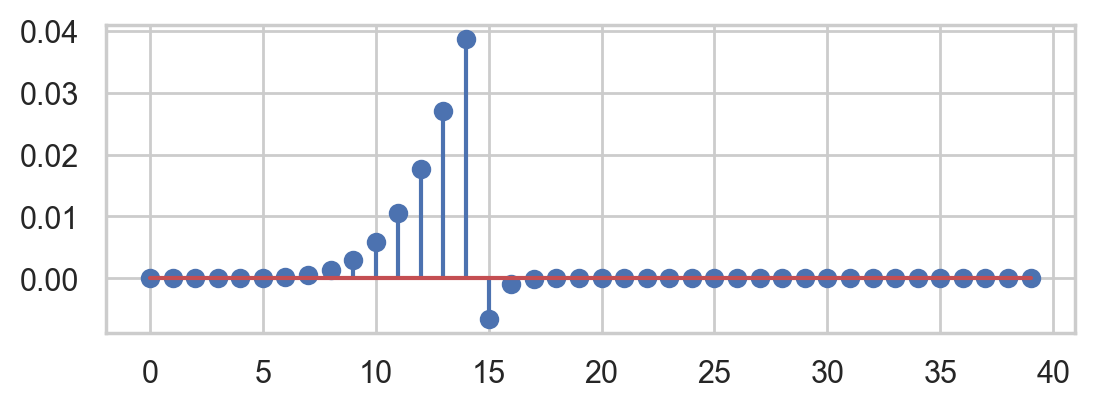

In [6]:
import numpy as np

def fH(h):
    lam = 20
    return lam**h * np.exp(-lam) / np.math.factorial(h)

# calculation is not stable for h > 14
import matplotlib.pyplot as plt
import numpy as np
hs = np.arange(0,40)
fHs = [fH(h) for h in hs]
plt.stem(fHs)

We can apply the log-trick to the formula for ...

<StemContainer object of 3 artists>

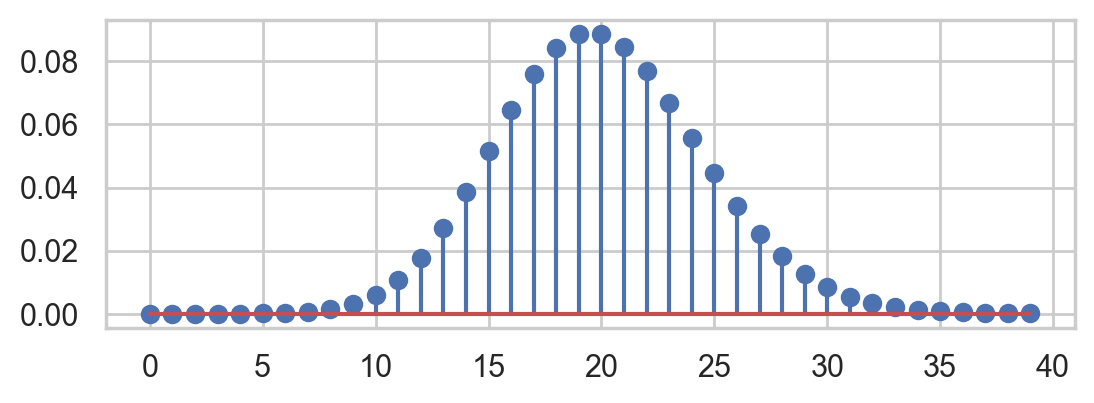

In [7]:
from scipy.special import gammaln

def fHalt(h):
    lam = 20
    return np.exp(h * np.log(lam) - lam - gammaln(h + 1))

fHalts = [fHalt(h) for h in hs]
plt.stem(fHalts)

The log-transform trick and `gammaln` function are really useful for dealing with large factorials and multiplications of small probabilities,
which occur a lot in statistical calculations.
The need for numerical stability is one thing you need to keep in mind when
you implement statistical algorithms in production.

In [8]:
from scipy.stats import norm
rvZ = norm(0,1)

The cumulative distribution function (CDF) $F_Z$ is defined as the integral 
of the probability density function $f_Z$ up to some value $z=b$.

$$
    \textrm{Pr}(\{Z \leq b\}) = F_Z(b) = \int_{z=-\infty}^{z=b} f_Z(z)\; dz.
$$

The computer model `rvZ` provides the method `.cdf` which allows us to obtain the values of $F_Z$ directly.

In [9]:
rvZ.cdf(2)

0.9772498680518208

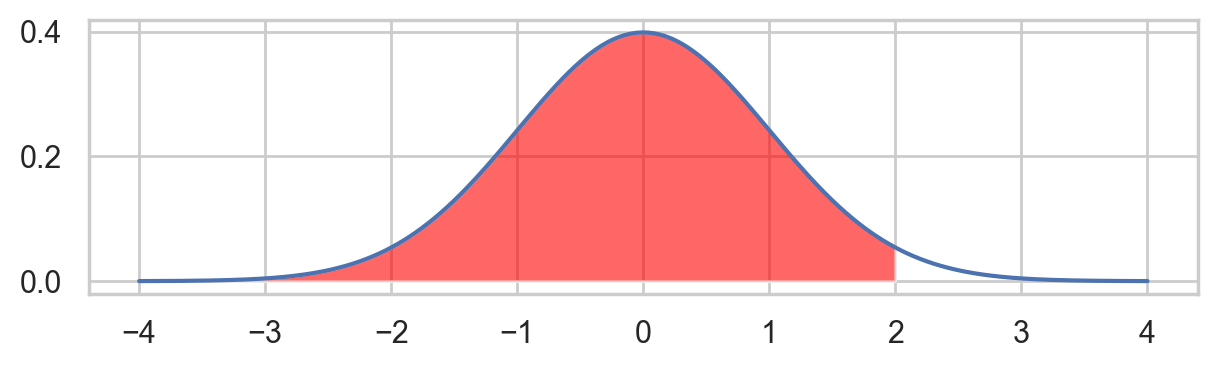

In [10]:
# FIGURES ONLY
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (zs < 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="red")
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_-infty_to_2.png")

We're often interested in computing the complement,

$$
    \textrm{Pr}(\{Z \geq b\}) = 1- F_Z(b) = \int_{z=b}^{z=\infty} f_Z(z) \; dz.
$$

In [11]:
1 - rvZ.cdf(2)

0.02275013194817921

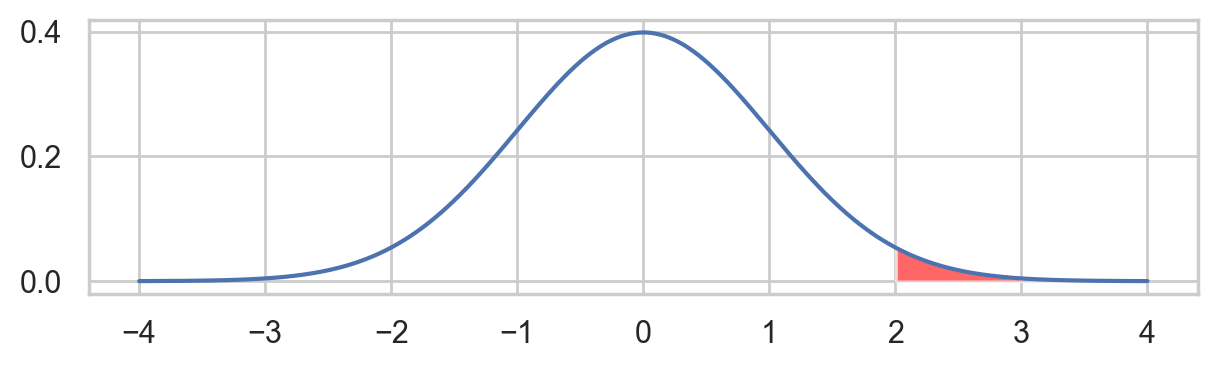

In [12]:
# FIGURES ONLY
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (zs > 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="red")
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_2_to_infty.png")

In statistics,
we often have to compute the probability in one or both tails of the distribution,
which corresponds the probability of observing "extreme values"

$\textrm{Pr}(\{Z \geq 2\}) = \int_{z=2}^{z=\infty} f_Z(z) dz$

In [13]:
from scipy.integrate import quad
quad(rvZ.pdf, 2, np.inf)[0]

0.02275013194817598

The cumulative distribution function (CDF) $F_Z$ is defined as the integral 
of the probability density function $f_Z$ up to some value $z=b$.

$$
    F_Z(b) = \textrm{Pr}(\{Z \leq b\}) = \int_{z=-\infty}^{z=b} f_Z(z)\; dz.
$$

The computer model `rvZ` provides the method `.cdf` which allows us to obtain the values of $F_Z$ directly.
For example, $F_Z(-2) = \textrm{Pr}(\{Z \leq -2\})$ can be computed as follows.

In [14]:
rvZ.cdf(-2)

0.022750131948179195

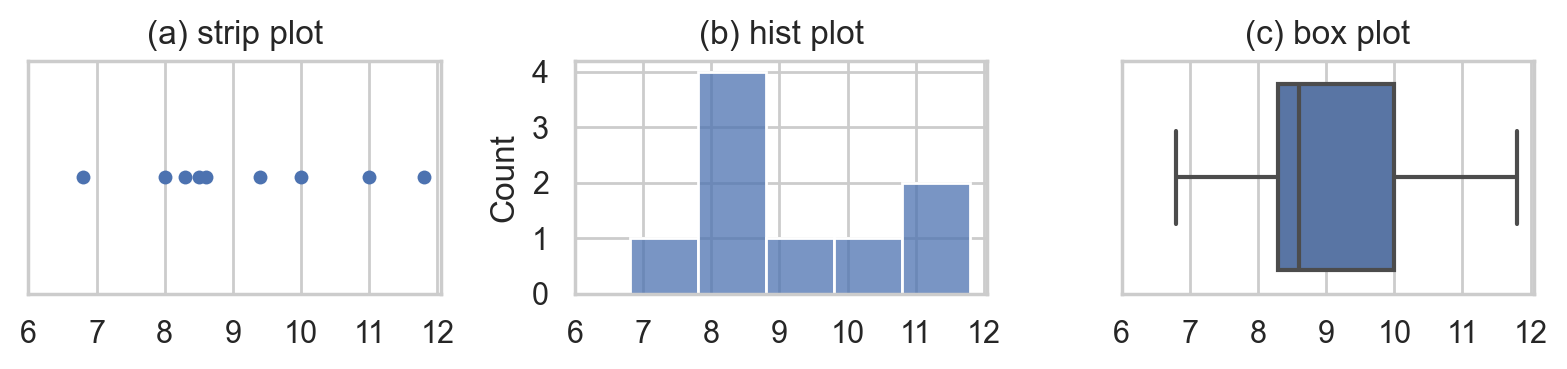

In [20]:
# FIGURES ONLY
import matplotlib.pyplot as plt
import seaborn as sns
with plt.rc_context({"figure.figsize":(8,2)}):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1.set_title("(a) strip plot")
    sns.stripplot(x=prices, ax=ax1, jitter=0)
    ax1.set_xticks(range(6,13))

    ax2.set_title("(b) hist plot")
    sns.histplot(x=prices, ax=ax2)
    ax2.set_xticks(range(6,13))
    ax2.set_yticks(range(0,5))

    ax3.set_title("(c) box plot")
    sns.boxplot(x=prices, ax=ax3)
    ax3.set_xticks(range(6,13))

savefig(fig, "figures/epricesW_strip_hist_box_plots.png")

#### Manual calculations

In [21]:
len(prices)

9

In [22]:
mean(prices)

9.155555555555555

In [23]:
def std(values):
    avg = mean(values)
    sqdevs = sum([(v-avg)**2 for v in values])
    var = sqdevs / (len(values) - 1)
    return var**(1/2)

std(prices)

1.5621388471508473

In [24]:
2**(1/2)

1.4142135623730951

### Data cleaning

In [34]:
import pandas as pd
epriceswide = pd.read_csv("https://nobsstats.com/datasets/epriceswide.csv")
print(epriceswide)

   East  West
0   7.7  11.8
1   5.9  10.0
2   7.0  11.0
3   4.8   8.6
4   6.3   8.3
5   6.3   9.4
6   5.5   8.0
7   5.4   6.8
8   6.5   8.5


### Data transformation

Once you have your hands on the data in some form, Pandas offers many functions for data transformations like selection of subsets, combining datasets, and other pre-processing steps on the raw data, in preparation for statistical analysis.

One of the most common data transformation steps is to convert data from "wide" format into "long" format, which is also known as "tidy data."


Click [here](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Aepriceswide_csv%20%3D%20'''%0AEast,West%0A7.7,11.8%0A5.9,10.0%0A7.0,11.0%0A4.8,8.6%0A6.3,8.3%0A6.3,9.4%0A5.5,8.0%0A5.4,6.8%0A6.5,8.5%0A'''%0A%0Aepriceswide%20%3D%20pd.read_csv%28io.StringIO%28epriceswide_csv%29%29%0A%0Aepriceswide.melt%28var_name%3D%22end%22,%20value_name%3D%22price%22%29&d=2023-07-02&lang=py&v=v1) to see a visualization of the `melt` operation on the `epriceswide` data frame into a tidy data frame `eprices`.

A discussion about tidy data is beyond the scope of this blog post, so I'll refer you to this blog post and video tutorials that will explain why tidy data is useful for doing statistics.


Click [here](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Aepriceswide_csv%20%3D%20'''%0AEast,West%0A7.7,11.8%0A5.9,10.0%0A7.0,11.0%0A4.8,8.6%0A6.3,8.3%0A6.3,9.4%0A5.5,8.0%0A5.4,6.8%0A6.5,8.5%0A'''%0A%0Aepriceswide%20%3D%20pd.read_csv%28io.StringIO%28epriceswide_csv%29%29%0A%0Aepriceswide.melt%28var_name%3D%22end%22,%20value_name%3D%22price%22%29&d=2023-07-02&lang=py&v=v1) to see a visualization of the above melt operation.

In [35]:
eprices = pd.melt(epriceswide, var_name="end", value_name='price')
print(eprices)

     end  price
0   East    7.7
1   East    5.9
2   East    7.0
3   East    4.8
4   East    6.3
5   East    6.3
6   East    5.5
7   East    5.4
8   East    6.5
9   West   11.8
10  West   10.0
11  West   11.0
12  West    8.6
13  West    8.3
14  West    9.4
15  West    8.0
16  West    6.8
17  West    8.5


In [38]:
pricesW = eprices[eprices["end"]=="West"]["price"]
pricesE = eprices[eprices["end"]=="East"]["price"]

pricesW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [37]:
pricesE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])